# K-means Clustering 

Implement the K-means algorithm and use it for image compression. 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

<a name="1"></a>
## 1 - Implementing K-means


<a name="1.1"></a>
### 1.1 Finding closest centroids

cluster assignment：phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 

In [38]:
def find_closest_centroids(X, centroids):

    # Set K
    K = centroids.shape[0]

    # To return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)
    
#     for i in range(len(idx)):
#         c_min = np.inf
#         c_idx = 0
#         for j in range(K):
#             c = (X[i] - centroids[j]) ** 2
#             c = c.sum()
#             if(c < c_min):
#                 c_min = c
#                 c_idx = j
                
#         idx[i] = c_idx

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        
        idx[i] = np.argmin(distance)
    
    return idx

<a name="1.2"></a>
### 1.2 Computing centroid means

compute_centroids: Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.


In [39]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    centroids = np.zeros((K, n))

    for k in range(K):
        points =  X[idx == k]   # Idx and X must be Np.array, resulting in an index of idx=k
        centroids[k] = np.mean(points, axis = 0)
        
    return centroids

<a name="2"></a>
## 2 - K-means on a sample dataset 

In [40]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


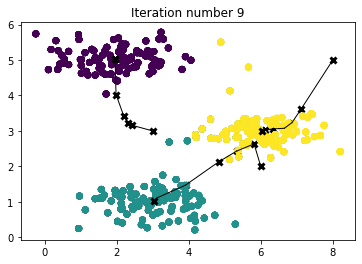

In [41]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="3"></a>
## 3 - Random initialization



In [42]:
def kMeans_init_centroids(X, K):
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    print(randidx[:K])
    
    return centroids

<a name="4"></a>
## 4 - Image compression with K-means

use the K-means algorithm to select the 16 colors that will be used to represent the compressed image. Treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space. 

In [43]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

**Visualize image**

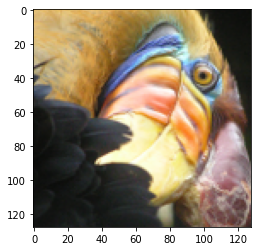

In [44]:
# Visualizing the image
plt.imshow(original_img)

**Check the dimension of the variable**

In [45]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


#### Processing data

First transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)

In [46]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (-1, 3))
print(X_img.shape)

(16384, 3)


<a name="4.2"></a>
### 4.2 K-Means on image pixels

In [47]:
K = 32  # centroid                    
max_iters = 10               

initial_centroids = kMeans_init_centroids(X_img, K) 

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

[ 8901  5710 15120   195 14696 10182  7910  9924 11838  3631 10978 14156
 16333 15452  9622  9319 10340  3024  8745  9467   581 10017 11403  1923
  7196   425 13704  3618 14728   663 11285 12052]
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [48]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])
print(centroids.shape)

Shape of idx: (16384,)
Closest centroid for the first five elements: [25 25 25 25 25]
(32, 3)


<a name="4.3"></a>
### 4.3 Compress the image


The original image required 24 bits for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits.
The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [49]:
# Represent image in terms of indices
X_recovered = centroids[idx,:] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

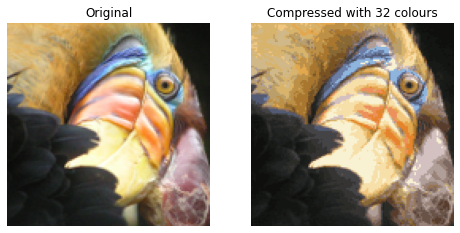

In [50]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

the resulting image retains most of the characteristics of the original, we also see some compression artifacts.